# Elbow Method clustering sample (Non Hierarchical Clustering)

The Elbow Method is a heuristic approach used to estimate the optimal number of clusters in a dataset. 

- By calculating the Sum of Squared Errors (SSE) for different values of k (number of clusters) and plotting the results, one can observe the "elbow" point in the plot.
- This "elbow" point typically signifies where increasing the number of clusters doesn't provide a significant decrease in SSE and hence might be the optimal number of clusters.
  - The SSE (often referred to as the Within-Cluster-Sum-of-Squares: WCSS) measures the sum of squared distances between data points and their assigned centroid.
  - A smaller SSE value indicates that the data points are closer to the centroids of their respective clusters, hence a better clustering.
- It's essential to note that this method offers a rule of thumb, and the actual number of clusters that's best for any given dataset can depend on various factors and may need further validation.

<function matplotlib.pyplot.show(close=None, block=None)>

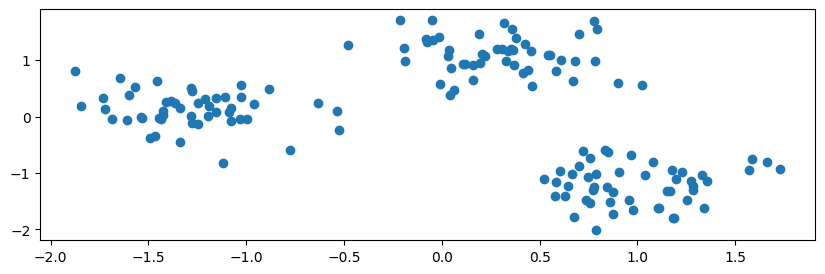

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn import preprocessing
from sklearn.cluster import KMeans


# Sample data creation.
X, y = make_blobs(
    # Total number of sample points.
    n_samples=150,
    # Specify the explanatory variables (number of dimensions).
    n_features=2,
    # Number of Clusters.
    centers=3,
    # Standard deviation within a cluster.
    cluster_std=0.5,
    # Shuffle samples.
    shuffle=True,
    # Specify the state of random number generator.
    random_state=0
)

# Data Standardization. (Match value scales incase they differ.)
sc = preprocessing.StandardScaler()
X_norm = sc.fit_transform(X)
x_axis = X_norm[:,0]
y_axis = X_norm[:,1]

plt.figure(figsize=(10, 3))
plt.scatter(x_axis, y_axis)
plt.show

In [2]:
def kmeans_clustering(cluster_num: int):
    return KMeans(
        n_clusters=cluster_num,
        n_init=10,
        max_iter=300,
        random_state=0
    )


target_range = range(1, 11)

distortions: list[float] = [
    # Access into cluster inertia (SSE (=Sum of Squared errors of prediction) in cluster).
    kmeans_clustering(i).fit(X_norm).inertia_
    for i
    in target_range
]
display(distortions)

[300.0,
 116.06524144078871,
 30.674121776362238,
 26.332543928594305,
 22.718970228349395,
 19.12340978155465,
 16.91278406524272,
 14.694386751693406,
 13.10143126968861,
 11.372793675420379]

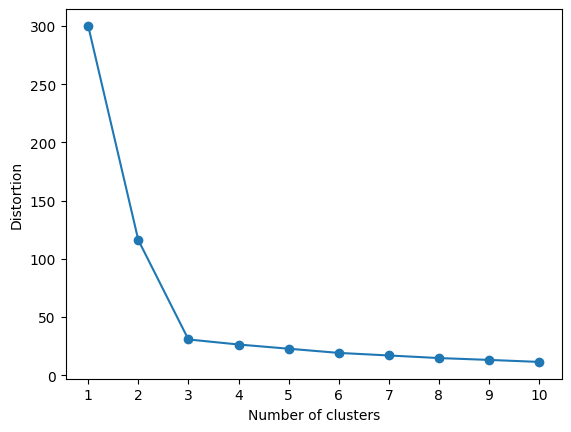

In [3]:
# Elbow diagram.
plt.plot(
    target_range,
    distortions,
    marker='o'
)
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.xticks(target_range)
plt.show()

The smaller the intra-cluster SSE value, the better the model is without distortions (= better clustering).

- In this case, the numbers declined sharply until cluster number 3, and remained almost flat after cluster number 4.
- In the Elbow Method, __the rapidly changing endpoint is chosen as the optimal class majority__.

<function matplotlib.pyplot.show(close=None, block=None)>

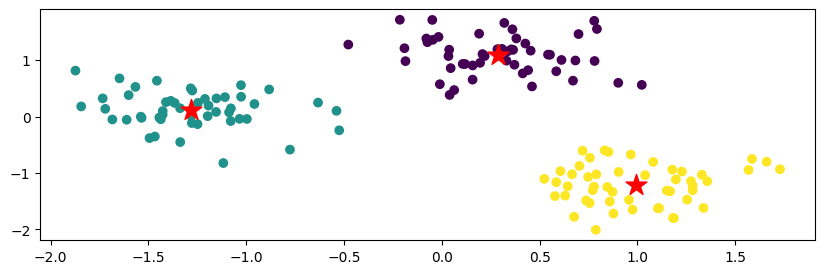

In [4]:
km = kmeans_clustering(3)
z_km = km.fit(X_norm)

plt.figure(figsize=(10, 3))
plt.scatter(
    # plot each cluster
    x_axis,
    y_axis,
    c=z_km.labels_
)
plt.scatter(
    # plot each cluster center
    z_km.cluster_centers_[:,0],
    z_km.cluster_centers_[:,1],
    s=250,
    marker='*',
    c='red'
)
plt.show